In [1]:
from fastscape.models import basic_model
from orographic_precipitation.fastscape_ext import OrographicPrecipitation, OrographicDrainageDischarge
import xsimlab as xs
import xarray as xr
import numpy as np
%load_ext xsimlab.ipython

In [2]:
model = basic_model.update_processes({
    'precipitation': OrographicPrecipitation,
    'drainage': OrographicDrainageDischarge
})

In [3]:
ds_in = xs.create_setup(
    model=model,
    clocks={'time':np.linspace(0,10e6,101)
    },
    input_vars={
        'grid__shape': [101, 201],
        'grid__length': [100e3, 200e3],
        'boundary__status': ['looped', 'looped', 'fixed_value', 'fixed_value'],
        'uplift__rate': 5e-3,
        'spl__k_coef': 2.5e-5,
        'spl__area_exp': 0.4,
        'spl__slope_exp': 1.,
        'diffusion__diffusivity': 0.,
        'init_topography__seed': 1234,
        'precipitation':{'rainfall_frequency':1, 
                         'latitude': 40, 
                         'precip_base': 5,        
                         'wind_speed': 10,          
                         'wind_dir': 0
         }
    },
    output_vars={
        'topography__elevation': 'time',
        'precipitation__precip_rate':'time'
    }
)

In [4]:
with model, xs.monitoring.ProgressBar():
    ds_out = ds_in.xsimlab.run()

             0% | initialize 

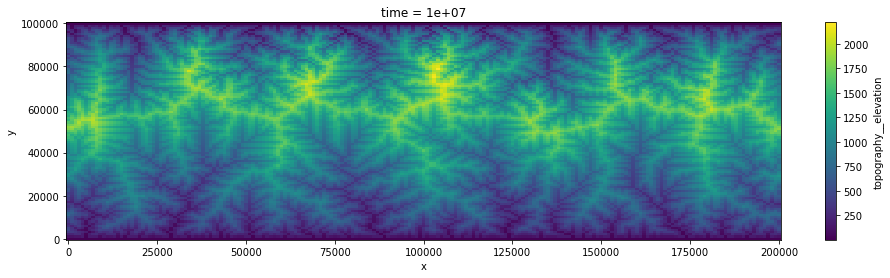

In [5]:
ds_out.topography__elevation.isel(time=-1).plot(size=4, aspect=4)

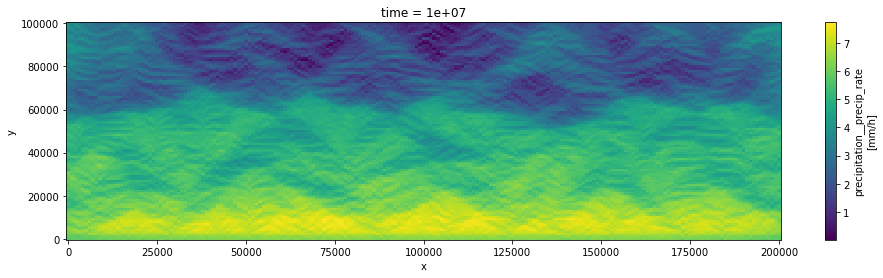

In [6]:
ds_out.precipitation__precip_rate.isel(time=-1).plot(size=4, aspect=4)